In [1]:
from keras.datasets import mnist #데이터셋 불러오기
from tensorflow.keras.utils import to_categorical #원핫 인코딩

In [2]:
# 데이터 불러오기
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# 데이터셋 살펴보기
train_images.shape
# 60000: 그림이 60000장 있다.
# 28: 그림의 가로 픽셀이 28개다
# 28: 그림의 세로 픽셀이 28개다.

(60000, 28, 28)

In [4]:
image = train_images[5] # 첫번째 그림

2


(<matplotlib.image.AxesImage at 0x789b254c2bf0>, None)

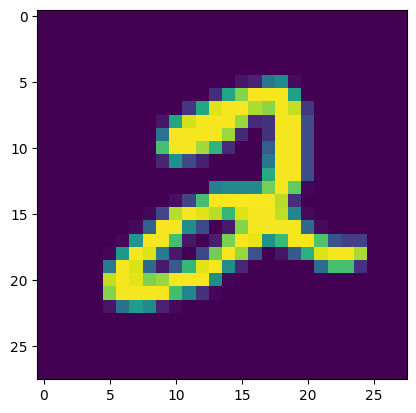

In [5]:
import matplotlib.pyplot as plt
plt.imshow(image), print(train_labels[5])

## 전처리

In [6]:
# 데이터 스케일링
# 모든 이미지 데이터의 픽셀 값을 0~1사이로 통일하기 위해 255로 나누어줌
train_images = train_images/255.0
test_images = test_images/255.0

# 데이터의 차원변경
# 입력노드에 입력할수 있도록 2차원 1차원으로 펴내어 표현
train_images = train_images.reshape(60000,784) # (60000, 28, 28) -> (60000, 784)
test_images = test_images.reshape(-1,784) # (10000, 28,28) -> (10000, 784)

# 레이블을 원핫인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [7]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## 데이터 분할

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels,
                                                                              test_size=0.2,
                                                                              shuffle=True)

## 모델만들기

In [10]:
from keras.models import Sequential # 층을 순서대로 쌓을때 사용하는 그릇
from keras.layers import Dense # 퍼셉트론으로 이루어진 하나의 층

In [11]:
model = Sequential() # 그릇만들기

In [12]:
model.add(Dense(128, input_dim=784, activation='relu')) # 784개의 입력노드 -> 128개의 출력노드로, 활성화 RELU
model.add(Dense(10, activation='softmax')) # 128개의 입력노드 -> 10개의 출력노드, 확률이 출력되어야 하므로 Softmax

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 모델의 컴파일 & 학습

In [17]:
# 딥러닝의 학습계획 수립
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# optimizer -> 학습률을 동적으로 조절하는 알고리즘
# loss -> 딥러닝을 학습하는데 사용할 손실함수
# metrics -> 딥러닝의 성능을 모니터링할때 (러닝커브 그릴때) 사용할 지표

# 딥러닝의 학습
history = model.fit(train_images, train_labels, # 학습할 데이터셋
                    batch_size=32, # 미분(나침반)을 계산할때 한번에 몇개의 데이터를 사용할 것인가
                    epochs=15, # 총 몇번 같은 데이터를 반복해서 학습을 시킬것인가
                    validation_data=(valid_images, valid_labels)) #러닝커브에서 모델의 일반화 능력을 어떤 데이터로 측정할 것인가

Epoch 1/15
1500/1500 [==============================] - 11s 6ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.1798 - val_accuracy: 0.9748
Epoch 2/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.1810 - val_accuracy: 0.9750
Epoch 3/15
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.1640 - val_accuracy: 0.9760
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1754 - val_accuracy: 0.9751
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.1653 - val_accuracy: 0.9778
Epoch 6/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1702 - val_accuracy: 0.9776
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1723 - val_accuracy

## 러닝커브

In [18]:
train_loss = history.history['loss'] #훈련데이터의 손실값
val_loss = history.history['val_loss'] #검증데이터의 손실값
train_acc = history.history['accuracy'] #훈련데이터의 정확도
val_acc = history.history['val_accuracy'] #검증데이터의 정확도

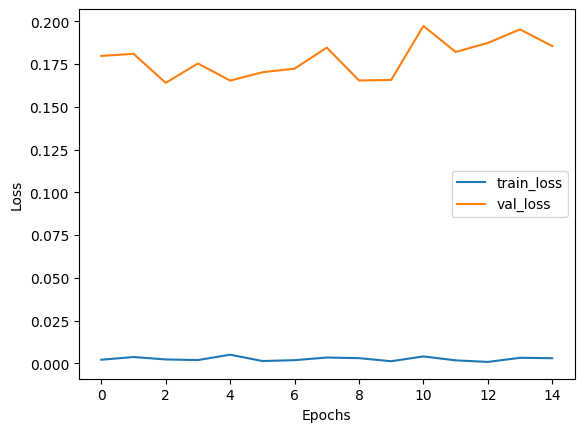

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epochs') # X축 이름
plt.ylabel('Loss') # y축 이름
plt.legend() # 범례표시

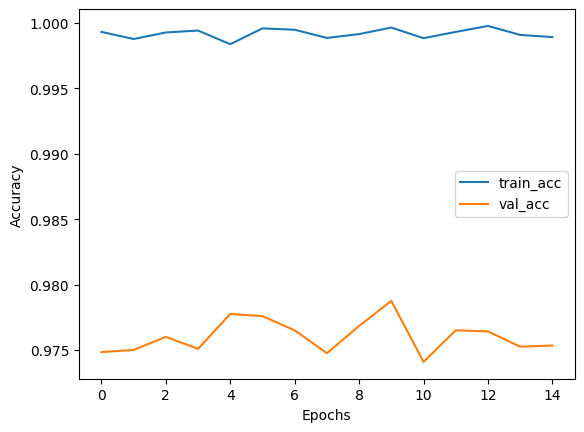

In [20]:
import matplotlib.pyplot as plt
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.xlabel('Epochs') # X축 이름
plt.ylabel('Accuracy') # y축 이름
plt.legend() # 범례표시

## 최종 학습된 모델의 점검

In [23]:
model # 최종 학습된모델

In [24]:
test_images.shape, test_labels.shape # 테스트 데이터셋의 크기

((10000, 784), (10000, 10))

In [30]:
y_prob = model.predict(test_images)
y_prob # 이미지가 각각의 카테고리로 분류될 확률을 계산 (10000, 10)

313/313 [==============================] - 1s 2ms/step


array([[6.2231836e-22, 8.8484864e-26, 1.7937184e-20, ..., 9.9999994e-01,
        1.2561646e-27, 2.7735724e-18],
       [6.1984216e-23, 6.6620351e-19, 9.9999994e-01, ..., 0.0000000e+00,
        6.5846075e-23, 0.0000000e+00],
       [2.4686113e-14, 9.9999934e-01, 1.8530648e-07, ..., 1.9216762e-07,
        1.2886792e-07, 2.0947098e-12],
       ...,
       [5.1861571e-36, 1.2702035e-31, 8.9132536e-35, ..., 3.8919410e-18,
        1.9215887e-15, 3.3024728e-15],
       [5.5267443e-29, 0.0000000e+00, 2.3606855e-29, ..., 2.3425366e-30,
        5.6332592e-13, 0.0000000e+00],
       [3.3718943e-27, 0.0000000e+00, 5.9925656e-30, ..., 0.0000000e+00,
        3.5272116e-26, 4.4701284e-38]], dtype=float32)

In [31]:
import numpy as np
y_pred = np.argmax(y_prob,axis=1) # 10개의 확률중에 가장 높은 확률값을 가진 카테고리를 반환

(<matplotlib.image.AxesImage at 0x789b1c86ead0>, 4)

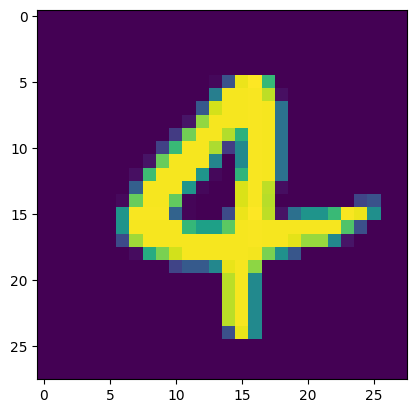

In [46]:
idx = 5556
plt.imshow(test_images[idx].reshape(28,28)), y_pred[idx]

## 잘못분류한 데이터

In [47]:
y_pred # 모델이 테스트 데이터에 대하여 최종 분류한 값
test_labels # 원핫인코딩된 카테고리 값

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
labels = np.argmax(test_labels,axis = 1) # 정답데이터 (원핫인코딩 데이터의 최대값의 위치를 찾으면 정답 카테고리임)

In [53]:
y_pred!=labels # 동일 위치에 같은 값이 있으면 False, 아니면 True
np.where(y_pred!=labels) # False가 있는 데이터의 위치를 반환

(array([ 247,  340,  445,  502,  582,  619,  659,  684,  691,  717,  740,
         760,  844,  900,  947,  956, 1014, 1039, 1052, 1112, 1156, 1178,
        1182, 1226, 1232, 1242, 1247, 1260, 1319, 1328, 1393, 1464, 1494,
        1500, 1520, 1530, 1549, 1553, 1581, 1609, 1617, 1621, 1681, 1754,
        1782, 1790, 1800, 1901, 1941, 1952, 1987, 2004, 2024, 2035, 2053,
        2070, 2098, 2109, 2118, 2130, 2135, 2179, 2182, 2185, 2272, 2293,
        2369, 2387, 2406, 2414, 2422, 2425, 2426, 2454, 2488, 2582, 2607,
        2630, 2648, 2654, 2721, 2866, 2896, 2915, 2921, 2927, 2938, 2939,
        2953, 2970, 2995, 3060, 3062, 3073, 3117, 3225, 3405, 3422, 3441,
        3475, 3503, 3520, 3533, 3550, 3558, 3559, 3567, 3597, 3604, 3674,
        3681, 3727, 3751, 3808, 3818, 3838, 3853, 3902, 3926, 3941, 3943,
        3985, 4007, 4027, 4065, 4078, 4123, 4163, 4193, 4199, 4248, 4289,
        4425, 4433, 4437, 4439, 4497, 4500, 4536, 4551, 4615, 4639, 4671,
        4690, 4740, 4761, 4789, 4807, 

(<matplotlib.image.AxesImage at 0x789b0b5d4340>, 8, 6)

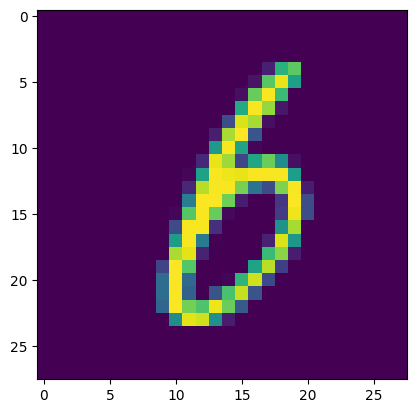

In [57]:
idx = 9858
plt.imshow(test_images[idx].reshape(28,28)), y_pred[idx], labels[idx]